<a href="https://colab.research.google.com/github/MennaAyman5/9000-Movies-Dataset/blob/main/9000%2B_Movies_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import libraries

In [4]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

###Reading the file


In [5]:
from google.colab import files
uploaded = files.upload()

Saving mymoviedb.csv to mymoviedb (1).csv


In [6]:
df = pd.read_csv('mymoviedb.csv',
                 lineterminator='\n')

In [73]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


###Data Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [6]:
df.shape

(9827, 9)

In [7]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


###Data cleaning

find duplicated

In [8]:
df.duplicated().any()

False

find null values

In [9]:
df.isnull().sum(axis = 0)

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [10]:
df.dtypes

Release_Date          object
Title                 object
Overview              object
Popularity           float64
Vote_Count             int64
Vote_Average         float64
Original_Language     object
Genre                 object
Poster_Url            object
dtype: object

I saw that the dates are many and I don't care about anything but the year. So I turned the column into a year only.

In [7]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [8]:
df['Release_Date'] = df['Release_Date'].dt.year

In [9]:
df['Release_Date'].unique()

array([2021, 2022, 2020, 1986, 2018, 1989, 2012, 2009, 2005, 2019, 2014,
       2016, 2001, 2015, 2002, 2017, 2011, 2007, 2004, 2010, 1972, 2023,
       2008, 1995, 1994, 1992, 2013, 2003, 2006, 1999, 1993, 1985, 1998,
       1950, 1997, 2000, 1991, 1937, 1990, 1977, 1940, 1981, 1942, 1973,
       1941, 1974, 1951, 1996, 1959, 1961, 1967, 1953, 1988, 1956, 1983,
       1976, 1955, 1970, 1984, 1971, 1987, 1963, 1980, 1939, 1975, 1979,
       1982, 1966, 1978, 1965, 1946, 1964, 1968, 1962, 1960, 1957, 1949,
       1922, 2024, 1969, 1954, 1933, 1932, 1958, 1952, 1944, 1931, 1948,
       1938, 1945, 1927, 1925, 1935, 1936, 1902, 1920, 1947, 1943, 1929,
       1926, 1921, 1930])

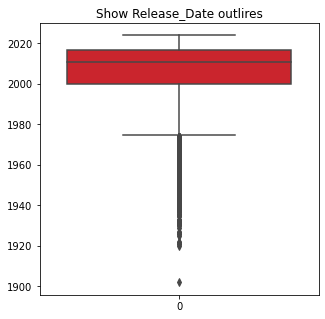

In [15]:
plt.figure(figsize=(5,5))
sns.boxplot( data=df['Release_Date'],
          
            color = '#E50914')
plt.title('Show Release_Date outlires')
plt.show()

this visulation show that data is almost between 2002 to 2018.

---



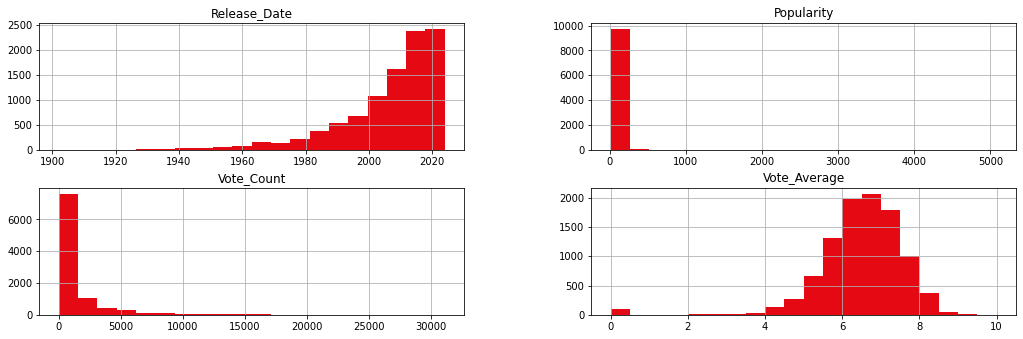

In [16]:
df.hist(bins=20, figsize=(17.5,17.5), layout=(6,2),color = '#E50914');

this visulation has made for numaric type.

---

In [17]:
df['Original_Language'].unique()

array(['en', 'ja', 'fr', 'hi', 'es', 'ru', 'de', 'th', 'ko', 'tr', 'cn',
       'zh', 'it', 'pt', 'ml', 'pl', 'fi', 'no', 'da', 'id', 'sv', 'nl',
       'te', 'sr', 'is', 'ro', 'tl', 'fa', 'uk', 'nb', 'eu', 'lv', 'ar',
       'el', 'cs', 'ms', 'bn', 'ca', 'la', 'ta', 'hu', 'he', 'et'],
      dtype=object)

there are a lot of language, so I'm not care about the lang of the movies. ^_^

---

dropping ( Title , 	Overview , Poster_Url ) 
becouse they not help me in the visulation.

In [10]:
cols_noise = ['Overview', 'Original_Language', 'Poster_Url']

df.drop(cols_noise, axis = 1, inplace = True)

In [19]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [20]:
df['Genre'].unique()

array(['Action, Adventure, Science Fiction', 'Crime, Mystery, Thriller',
       'Thriller', ..., 'Comedy, TV Movie, Romance',
       'Science Fiction, Fantasy, Family, Music',
       'War, Drama, Science Fiction'], dtype=object)

In [21]:
df['Genre'].nunique()

2337

In [11]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,Crime
4,2022,The Batman,3827.658,1151,8.1,Mystery


###What is most of the film genre?

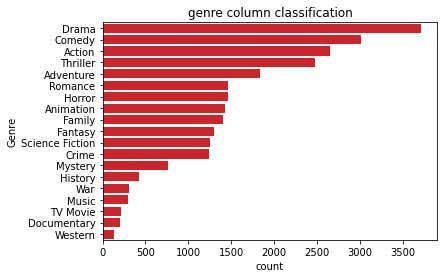

In [51]:
sns.countplot(y = 'Genre', data = df,  
            order = df['Genre'].value_counts().index,
            color = '#E50914')
plt.title('genre column classification')
plt.show()

Drama is the most * __ *

---

----

###What kind of movies take the highest rating?

In [25]:
df2=df.iloc[:,0:]

In [26]:
df2['Vote_Count'].max()
df2.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,Crime
4,2022,The Batman,3827.658,1151,8.1,Mystery


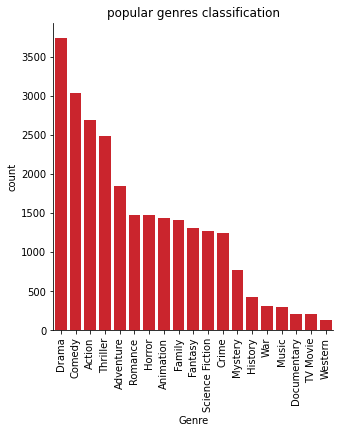

In [29]:
sns.catplot(x = 'Genre', data = df,
            kind = 'count', order = df['Genre'].value_counts().index,
            color = '#E50914')
plt.title('popular genres classification')
plt.xticks(rotation=90)
plt.show()


The most movies that have the highest rating is( *Drama* )


---


onther solve

In [61]:
'''
def catigorize_col (df, col, labels):
    
    # setting the edges to cut the column accordingly
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates='drop')
    return df
'''

In [62]:
'''
labels = ['not_popular', 'below_avg', 'average', 'popular']

# categorize column based on labels and edges
catigorize_col(df, 'Vote_Average', labels)

# confirming changes
df['Vote_Average'].unique()
'''

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [63]:
#df['Vote_Average'].value_counts()

not_popular    6999
below_avg      6581
average        6432
popular        5540
Name: Vote_Average, dtype: int64

In [64]:
'''
df.dropna(inplace = True)

df.isna().sum()
'''

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [65]:
'''
df['Genre'] = df['Genre'].str.split(', ')

df = df.explode('Genre').reset_index(drop=True)
df.head()
'''

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [66]:
'''
df['Genre'] = df['Genre'].astype('category')

df['Genre'].dtypes
'''

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False)

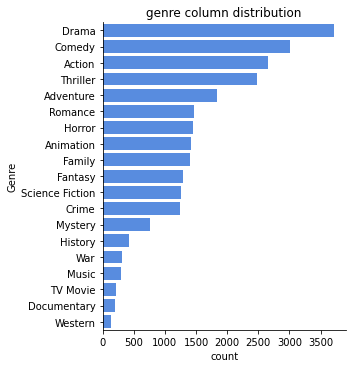

In [67]:
'''
sns.catplot(y = 'Genre', data = df, kind = 'count', 
            order = df['Genre'].value_counts().index,
            color = '#4287f5')
plt.title('genre column distribution')
plt.show()
'''

---
---

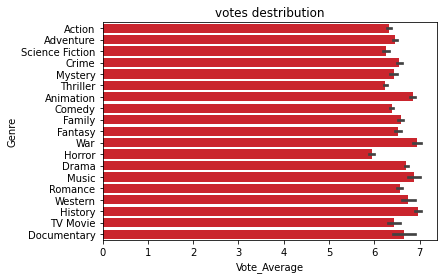

In [38]:
sns.barplot(x = 'Vote_Average',
             y= 'Genre',
             data = df, 
            #order = df['Vote_Average'].value_counts().index,
            color = '#E50914')
plt.title('votes destribution')
plt.show()

In [20]:
df['Vote_Average'].unique()

array([ 8.3,  8.1,  6.3,  7.7,  7. ,  6.6,  6.8,  5.3,  7.2,  5.9,  7.3,
        7.1,  5.1,  4.6,  6. ,  8.2,  5.4,  6.1,  8.4,  6.9,  5.8,  7.4,
        7.8,  8. ,  6.2,  6.7,  7.6,  8.6,  4.8,  5.5,  7.9,  6.4,  7.5,
        5.7,  2.2,  6.5,  0. ,  5.6,  5.2,  5. ,  8.5,  3.5,  4. ,  3.3,
        4.7,  4.2,  4.3,  2. ,  4.1,  4.9,  8.7,  4.5,  9.1,  4.4,  3.6,
        2.8,  3.9,  3.8,  9. ,  3. ,  3.1,  3.7,  3.4,  8.9,  2.9,  8.8,
        3.2,  1.5,  9.2,  2.5,  1.8,  2.4,  2.6, 10. ])

In [33]:
#for i in df['Vote_Average'].items:
#  if df['Vote_Average'].items >=7:
#    df['Vote_Average'].replace(i, value="41")
#df['Vote_Average'].items >=7:
 # df['Vote_Average']
#df['Vote_Average'].replace(df['Vote_Average'].items >=7:, value="41")

---

###What is the movie with the highest Popularity rate? And what kind is it?

In [36]:
df['Popularity'].max()

5083.954

In [34]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction


Spider-Man: No Way Home has highest Popularity and its kind is Action

###What year was the largest number of films produced?

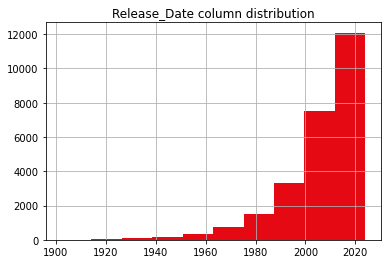

In [39]:
df['Release_Date'].hist(color='#E50914')
plt.title('Release_Date column distribution')
plt.show()

2020 is the year 

---

Every year what kind of movies were produced more

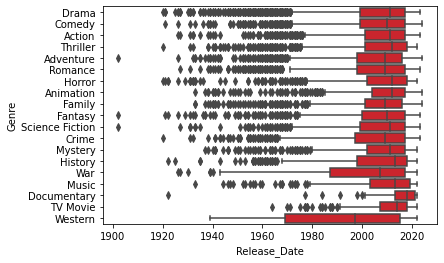

In [47]:
sns.boxplot(x = 'Release_Date',
             y= 'Genre',
             data = df, 
            order = df['Genre'].value_counts().index,
            color = '#E50914')

plt.show()

###Which movie is more popular? Which movie is less popular?


In [12]:
df['Popularity'].describe()

count    25793.000000
mean        42.001288
std        113.341050
min         13.354000
25%         16.366000
50%         21.865000
75%         36.503000
max       5083.954000
Name: Popularity, dtype: float64

In [18]:
df.tail()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25788,2021,The United States vs. Billie Holiday,13.354,152,6.7,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,6.7,History
25790,1984,Threads,13.354,186,7.8,War
25791,1984,Threads,13.354,186,7.8,Drama
25792,1984,Threads,13.354,186,7.8,Science Fiction


- Threads	has less Popularity
- Spider-Man: No Way Home	Peter Parker is unmasked and no  has more Popularity

-Because I noticed that they are ranked from the top to the lowest Popularity.

In [34]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

Saving download (1).jpg to download (1) (1).jpg


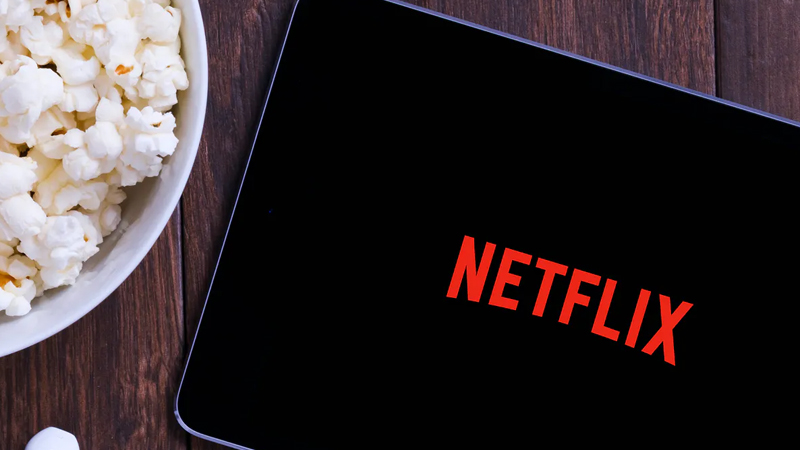

In [35]:
Image("download (1).jpg", width=600)

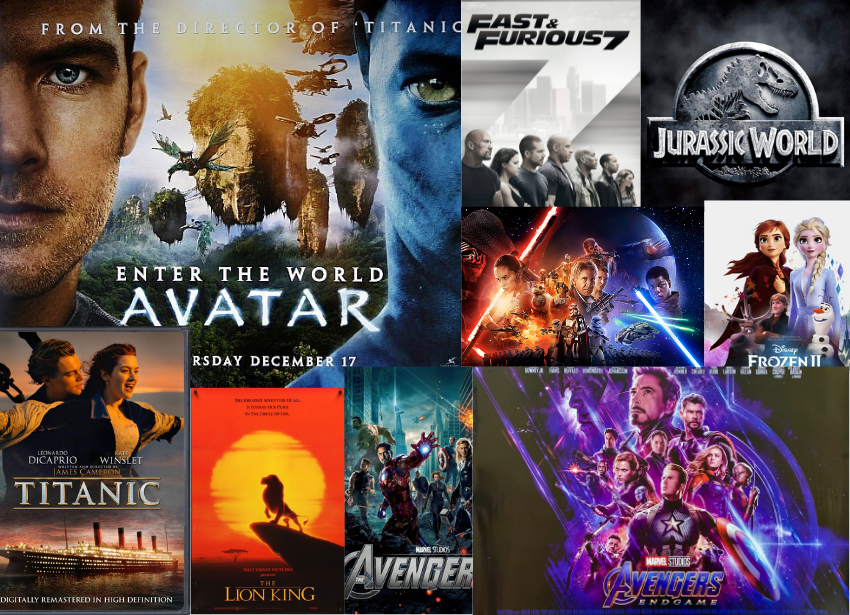